# EDA

> fuente: Air bnd New York

In [65]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import joblib


### Empezamos leyendo con Pandas el archivo csv

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


1. train_date.describe().
- Este método genera estadísticas descriptivas que resumen la tendencia central, dispersión y forma de la distribución de cada columna 
- Para columnas numéricas muestra:
  count, mean (media), std (desviación estándar), min, percentiles (25%, 50% = mediana, 75%), y max 
- Para columnas de tipo “objeto” (strings, fechas…), usando include='all', muestra:
count, unique, top (valor más frecuente) y freq (frecuencia) 
2. El sufijo .T
T es un accesorio para .transpose(), que rota la tabla intercambiando filas por columnas

In [37]:
train_date = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
train_date.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


- False significa que esa fila no es un duplicado.
- True indicaría que esa fila sí es un duplicado de una fila previa.

In [38]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [39]:
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Obtendremos las dimensiones: vemos que tenemos 48895 filas y 16 columnas

In [40]:
df.shape

(48895, 16)

> Aqui vemos que la columna name tiene mas de un valor nulo, ya que nos devuelve True (16)
> Esto tambien nos muestra las filas donde esa columna esta vacia, por lo que procedemos a eliminarla.

In [41]:
df['name'].isnull().sum()
df[df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


> Aqui tambien vemos todas las columnas con mas de un valor nulo

In [42]:
df.isnull().sum()[df.isnull().sum() > 0]

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

> Voy a empezar a rellenar los valores nulos, ya que no estoy segura de eliminarlos (de momento)

In [43]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Conclusion
>
> Como se ve, hemos cambiado las columnas que tenian mas valores nulos 

> Voy a eliminar la columna name y host_name ya que para mi no me ayuda a predecir
precios de las habitaciones, ni hacer una clasificacion de tipo de habitacion 

In [44]:
# Eliminando name
df = df.drop(columns=['name'])

In [45]:
# Eliminando host_name
df = df.drop(columns = ['host_name'])

In [46]:
df = df.drop(columns = ['id'])
df = df.drop(columns = ['host_id'])

In [47]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [48]:
df.shape

(48895, 12)

In [49]:
cat_cols = df.select_dtypes(include='object').columns
print("Columnas categóricas a codificar:")
print(cat_cols)

Columnas categóricas a codificar:
Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], dtype='object')


In [50]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

 > Estas son las columnas object que se deben convertir a números:
 > 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'
 >
 > Los algoritmos de ML requieren datos numericos, ya que no pueden trabajar directamente con texto
 > por ese motivo es que transformamos los datos categóricos en formatos numéricos.

In [51]:
# Convertir 'last_review' a tipo fecha (si deseas usar partes de la fecha)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
# Aplicamos One-Hot Encoding a las otras columnas categóricas
df_encoded = pd.get_dummies(df, columns=['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first=True)
# Resultado final
print("DataFrame convertido completamente a números")
print(df_encoded.head())


DataFrame convertido completamente a números
   latitude  longitude  price  minimum_nights  number_of_reviews last_review  \
0  40.64749  -73.97237    149               1                  9  2018-10-19   
1  40.75362  -73.98377    225               1                 45  2019-05-21   
2  40.80902  -73.94190    150               3                  0         NaT   
3  40.68514  -73.95976     89               1                270  2019-07-05   
4  40.79851  -73.94399     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   neighbourhood_group_Brookl

### Análisis multivariante, tanto para variables numéricas como categóricas:

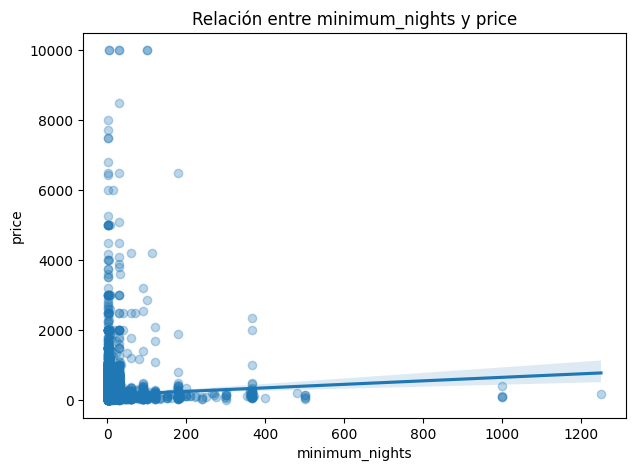

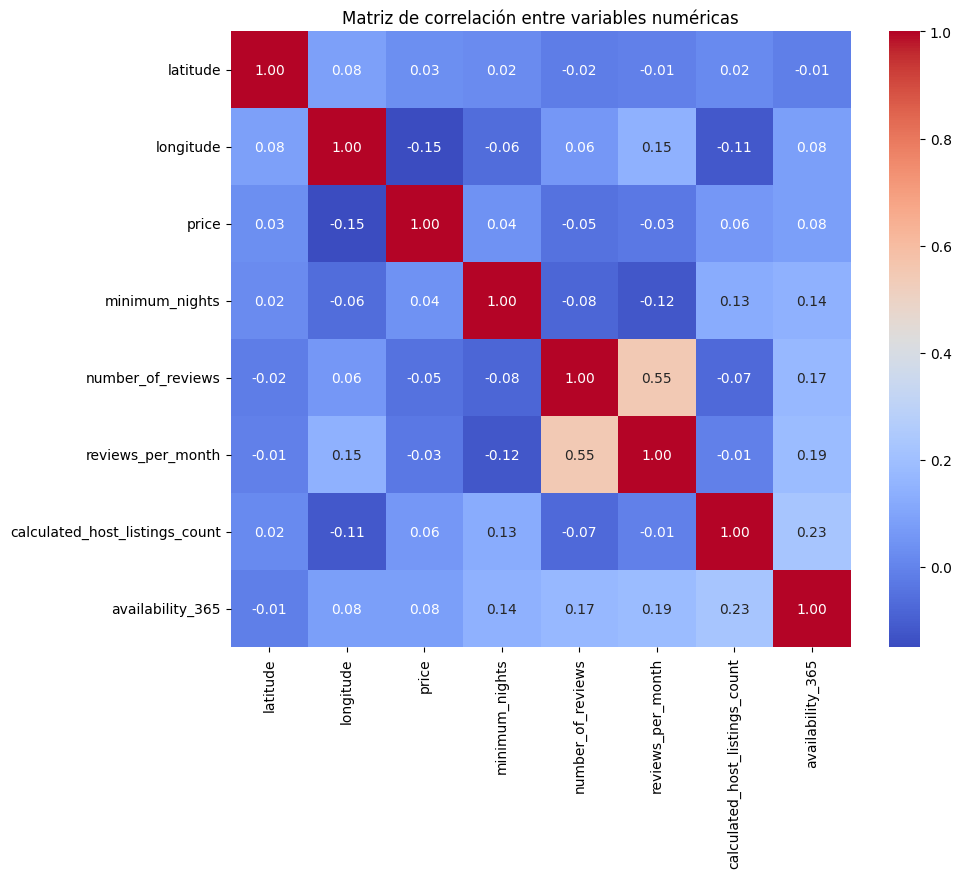

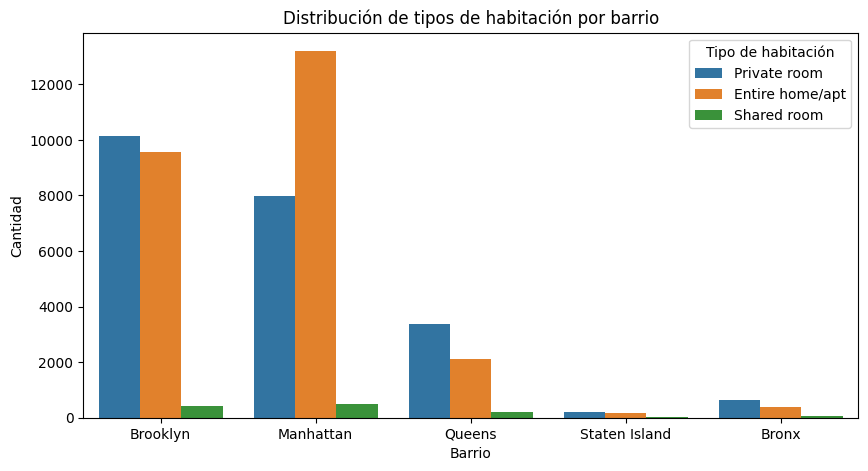

In [52]:
# --- Análisis multivariante ---

# 1. Numéricas vs Numéricas: regplot y heatmap de correlación
# Ejemplo: relación entre 'price' y 'minimum_nights'
plt.figure(figsize=(7,5))
sns.regplot(x='minimum_nights', y='price', data=df, scatter_kws={'alpha':0.3})
plt.title('Relación entre minimum_nights y price')
plt.show()

# Matriz de correlación y heatmap
plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

# 2. Categórica vs Categórica: countplot
# Ejemplo: distribución de room_type por neighbourhood_group
plt.figure(figsize=(10,5))
sns.countplot(x='neighbourhood_group', hue='room_type', data=df)
plt.title('Distribución de tipos de habitación por barrio')
plt.xlabel('Barrio')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de habitación')
plt.show()

### Ingenieria de caracteristicas
>
> Detectamos y eliminamos outliers en la columna 'price' usando el metodo IQR.
>
> Definimos los límites inferior y superior
>
> Filtramos el DataFrame para quedarnos solo con los valores dentro de los limites

In [53]:

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sin_outliers = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]

print(f"Filas originales: {df.shape[0]}")
print(f"Filas sin outliers: {df_sin_outliers.shape[0]}")

Filas originales: 48895
Filas sin outliers: 45923


Valores nulos por columna:
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


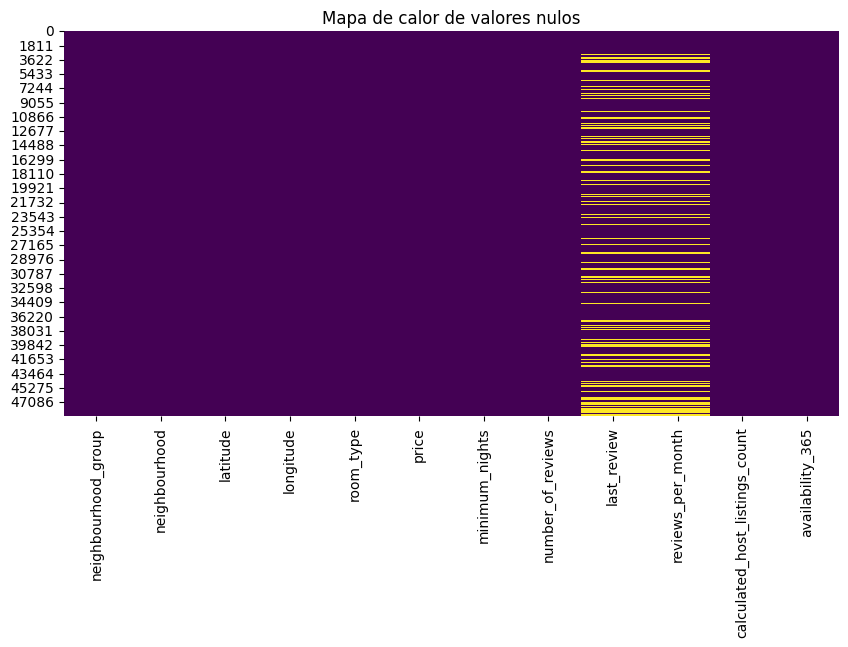

Valores nulos después del tratamiento:
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [54]:

# Análisis de valores faltantes

# 1. Ver cuántos valores nulos hay por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# 2. Visualización rápida de los nulos

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de calor de valores nulos")
plt.show()

# 3. Decisiones: ejemplo de rellenar y eliminar
# Rellenar valores nulos en 'reviews_per_month' con 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Eliminar filas donde 'last_review' es nulo (si es importante para el análisis)
df = df.dropna(subset=['last_review'])

# Si hay columnas con muchos nulos y no aportan, se pueden eliminar:
# df = df.drop(columns=['columna_con_muchos_nulos'])

# Comprobamos nuevamente los nulos
print("Valores nulos después del tratamiento:")
print(df.isnull().sum())

### Inferencia de nuevas caraterisitcas

**a) Extraer el año y mes**

In [55]:
# Extraer año y mes de la columna 'last_review'
df['last_review_year'] = df['last_review'].dt.year
df['last_review_month'] = df['last_review'].dt.month

#### Conclusion del apartado A
>
> Esto sirve para crear dos nuevas columnas que indican el año y el mes de la ultima reseña de cada anuncio.
>
> Esto nos ayudará a analizar tendencias temporales. Por ejemplo, ver si los anuncios con reseñas mas recientes tienen precios diferentes.



**b) Crear una variable binaria: precio alto**


In [56]:
# Crear una columna que indique si el precio es mayor que la mediana
mediana = df['price'].median()
df['precio_alto'] = (df['price'] > mediana).astype(int)

#### Conclusión del apartado B
> 
> Crear una columna que vale 1 si el precio del anuncio es mayor que la mediana y 0 si no lo es. 
> 
> Esto es útil para clasificar los anuncios en “caros” y “no caros” y hacer análisis o modelos de clasificación.



**c) Calcular la antigüedad del anuncio (en días)**


In [57]:
# Calcular la antigüedad del anuncio desde la última reseña
from datetime import datetime
df['antiguedad_dias'] = (datetime.now() - df['last_review']).dt.days

#### Conclusión del apartado C
>
> Crear una columna que indica cuántos días han pasado desde la última reseña de cada anuncio. 
> 
> Así puedes analizar si los anuncios más antiguos o más recientes tienen características diferentes.


### Split

> Separamos variables - X contiene las columnas del DF menos price, Y  contiene solo la columna price (variable que queremos predecir).
>
> También dividimos los datos en dos partes (entrenamiento y prueba) para poder ver cuantas filas hay en cada parte despues de la división.

In [59]:

# queremos predecir 'price' y el resto son variables predictoras
X = df.drop(columns=['price'])
y = df['price']

# Realizamos el split: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (31074, 15)
Tamaño de X_test: (7769, 15)
Tamaño de y_train: (31074,)
Tamaño de y_test: (7769,)


#### Conclusión
>
> Este paso es importante para entrenar mi modelo con una parte de los datos y luego probarlo con datos que no ha visto.
>
> Asegurando una evaluación justa y realista del rendimiento del modelo.

### Scaling y Encoding

In [60]:
# Escalado (normalización) de las variables numéricas usando MinMaxScaler

# Selecciona solo las columnas numéricas (excepto 'price' ya es nuestro target)
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Inicializa el scaler
scaler = MinMaxScaler()

# Ajusta y transforma los datos de entrenamiento y prueba
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("Escalado MinMax aplicado a las variables numéricas.")

Escalado MinMax aplicado a las variables numéricas.


In [64]:
# ENCODING de variables categóricas

# 1. Label Encoding (para variables con solo dos categorías o para modelos de árbol)
label_encoder = LabelEncoder()
# Ejemplo: si 'room_type' tiene pocas categorías
df['room_type_le'] = label_encoder.fit_transform(df['room_type'])

# 2. One Hot Encoding (para variables categóricas nominales) esto tambien lo utilizamos mas arriba
# Usualmente se usa para variables como 'neighbourhood_group', 'room_type', etc.
df_onehot = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# 3. Ordinal Encoding (para variables categóricas con un orden lógico)
# Ejemplo: si tienes una columna 'calidad' con valores ['bajo', 'medio', 'alto']
# ordinal_encoder = OrdinalEncoder(categories=[['bajo', 'medio', 'alto']])
# df['calidad_ordinal'] = ordinal_encoder.fit_transform(df[['calidad']])

print("Label Encoding, One Hot Encoding y Ordinal Encoding aplicados .")

Label Encoding, One Hot Encoding y Ordinal Encoding aplicados .


In [69]:
# Guardar los scalers y encoders para usarlos después (por ejemplo, en producción o para transformar nuevos datos)

# Guardar el MinMaxScaler
joblib.dump(scaler, 'minmax_scaler.pkl')

# Guardar el LabelEncoder para 'room_type'
joblib.dump(label_encoder, 'label_encoder_room_type.pkl')

# Si usas OrdinalEncoder, descomenta y guarda así:
# joblib.dump(ordinal_encoder, 'ordinal_encoder_calidad.pkl')


print("Scalers y encoders guardados en archivos .pkl")


Scalers y encoders guardados en archivos .pkl



#### Conclusión

> Guardar los objetos de escalado y codificación (scaler y encoders) es fundamental para asegurar que cualquier dato nuevo que llegue en el futuro sea transformado exactamente igual que los datos de entrenamiento.  
> Así, garantizamos la coherencia en el preprocesamiento tanto en la fase de entrenamiento como en la de predicción o producción, evitando errores y asegurando que el modelo reciba los datos en el mismo formato numérico.  
> Además, estos archivos `.pkl` permiten reutilizar los mismos objetos sin tener que volver a ajustarlos, facilitando la implementación y el despliegue del modelo.